### import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time
from matplotlib import cm as cm
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### load data

In [2]:
def loadData(file):
    data = pd.read_csv('data/'+file, sep="\t", header=None)
    return data

In [53]:
#load data
xtrain = loadData('xtrain.txt').T
xtest = loadData('xtest.txt').T
ytrain = loadData('ytrain.txt')

# #take first row as columns names
header1 = xtrain.iloc[0]
xtrain = xtrain[1:]
xtrain = xtrain.rename(columns = header1)

header2 = xtest.iloc[0]
xtest = xtest[1:]
xtest = xtest.rename(columns = header2)


In [4]:
xtrain.shape, ytrain.shape

((184, 4654), (184, 1))

In [5]:
negatif = 0
positif = 0
for i in range(len(ytrain)):
    if ytrain[0][i] == -1:
        negatif += 1
    else:
        positif += 1
print(negatif, positif)

118 66


In [6]:
xtrain.head()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
1,8.44,7.84,9.23,2.2,4.93,10.31,7.85,9.91,11.37,3.48,...,7.71,11.32,6.37,8.63,8.61,7.42,8.79,4.7,7.23,8.28
2,7.93,8.47,7.77,2.48,6.7,11.03,3.33,9.53,10.91,4.28,...,9.98,10.4,5.96,7.61,9.51,8.2,9.27,4.7,6.7,12.78
3,7.53,7.49,9.49,5.66,5.99,8.87,3.48,8.02,10.73,4.07,...,8.34,10.57,6.92,8.2,8.71,8.56,8.9,4.7,7.7,12.22
4,7.72,8.38,8.03,5.22,6.95,2.73,4.06,9.26,10.9,7.4,...,9.05,10.92,5.73,8.44,9.18,7.86,9.3,5.58,7.95,12.18
5,7.89,7.75,6.99,2.2,7.06,11.38,3.65,9.22,10.37,3.89,...,9.16,10.73,7.45,7.79,9.15,7.97,8.5,4.7,6.63,12.12


In [7]:
xtest.head()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
1,8.54,7.76,8.08,2.2,7.23,10.07,4.16,9.77,10.7,5.35,...,9.44,11.18,6.65,7.92,9.32,8.48,8.51,4.01,7.91,9.46
2,8.13,8.18,7.68,2.2,7.11,8.91,5.05,8.8,10.64,4.86,...,8.51,11.31,5.76,7.43,10.39,8.23,9.49,4.7,7.14,7.02
3,7.94,8.26,7.37,2.2,6.98,11.81,4.16,10.07,10.64,4.3,...,8.4,10.2,5.35,8.42,9.44,7.87,8.64,4.78,6.13,10.57
4,8.7,8.08,8.27,2.2,7.45,7.9,5,8.66,10.41,5.07,...,8.9,10.77,6.6,7.8,9.39,8.74,9.61,5.13,6.73,5.31
5,8.97,8.2,8.87,2.2,6.98,11.49,3.47,9.97,11.63,4.65,...,9.15,11.9,7.34,8.26,8.81,8.12,9.93,7.07,6.84,3


In [ ]:
np.all(xtrain.columns == xtest.columns)

In [ ]:
xtrain.describe()

### Features Selection

In [ ]:
np.random.seed(41)
names = xtrain.columns.values
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
importances = []
nameslist = []
for name, importance in zip(names, rf.feature_importances_):
    if importance != 0.0:
        #print(name, "=", importance) 
        importances.append(importance)
        nameslist.append(name)
#features = iris['feature_names']
# importances = rf.feature_importances_
# indices = np.argsort(importances)


In [ ]:
x_train = xtrain[nameslist]

In [ ]:
featuresImportances = pd.DataFrame(importances, index=nameslist, 
                              columns=["Importance"])
featuresImportances = featuresImportances.sort_values(by=['Importance'], ascending=False)
featuresImportances

In [ ]:
nameslist = np.array(nameslist)
importances.sort()
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances, align='center')
#plt.yticks(range(len(nameslist)), [nameslist[i] for i in range(len(nameslist))])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

### Lasso features selection

/usr/lib/python3/dist-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Features reduced from       4654 to        242


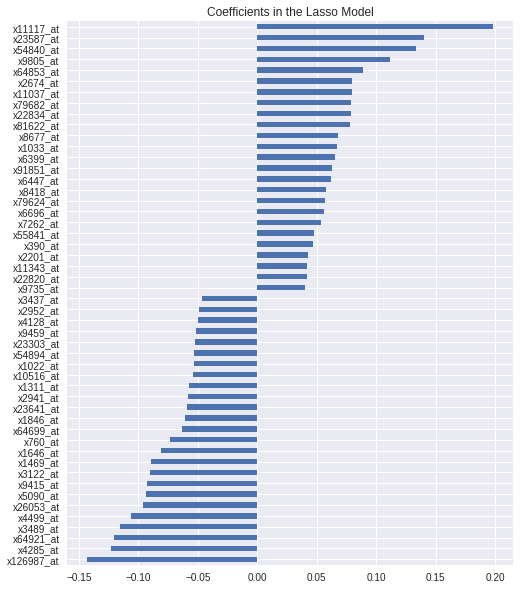

In [8]:
from sklearn.linear_model import Lasso
x_train = np.array(xtrain)
lass = Lasso(
        max_iter=3000,
        alpha= 0.000281,
        random_state= 5 
        )
lass.fit(xtrain,ytrain)
lass.coef_.min(), lass.coef_.max()
#Checking Features Importances
import matplotlib
coef = pd.Series(lass.coef_, index = xtrain.columns)
#print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


imp_coef = pd.concat([coef.sort_values().head(25),
                     coef.sort_values().tail(25)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

# Selection of features
good_features = np.abs(np.array(lass.coef_)) > 0

print("Features reduced from %10d to %10d" % (x_train.shape[1], int(good_features.sum())))
#saving data
train_lasso_select = xtrain.iloc[:, good_features]
test_lasso_select= xtest.iloc[:, good_features]
train_lasso_select.to_csv('train_lasso_select.csv',index=False)
test_lasso_select.to_csv('test_lasso_select.csv',index=False)

In [9]:
xtrain_lasso = xtrain.T[good_features].T

In [10]:
xtest_lasso = xtest.T[good_features].T

### split data

In [11]:
Xtrain,Xtest, Ytrain, Ytest = train_test_split(xtrain_lasso, ytrain,test_size=0.34 )
Xtrain,Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain,test_size=0.17 )

In [12]:
Xtrain.shape, Xval.shape, Xtest.shape, xtest.shape

((100, 242), (21, 242), (63, 242), (92, 4654))

### Plot Area Under Curve

In [13]:
from sklearn import metrics 
def plot_roc(model, parameters, y_true):
    """
    Arguments:
    model - trained model .
    parameters - array-like or sparse matrix of shape  [n_samples, n_features]. The input samples. 
    y_true - True binary labels in range {0, 1} or {-1, 1}. If labels are not binary, pos_label should be explicitly given.
    """
    if model is None:
        return 0., 0., np.array([])
    
    predicted = model.predict_proba(parameters)[:,1]
    threshold = 0.5
    predicted_binary = (predicted > threshold).astype(int)
    
    fpr, tpr, threshold = metrics.roc_curve(y_true, predicted, pos_label=1)

    roc_auc = metrics.auc(fpr, tpr) 
    ks = np.max(tpr - fpr) # Kolmogorov-Smirnov test

#     print('ROC_auc = ', roc_auc)
#     print('KS_test = ', ks)
    print('AUC score: %f ' % metrics.roc_auc_score(y_true, predicted)) 

    try:
        plt.title('%s ROC curve ' % model.__class__.__name__)
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1], [0,1], 'r--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')

        # plt.savefig('ROC_curve.png')
        plt.show()
    except: pass
    return threshold

### Logistic Regression

In [14]:
Xtrain, Ytrain = np.array(Xtrain), np.array(Ytrain)[:,0]

In [19]:
# Grid search cross validation
np.random.seed(41)
grid={"C":np.linspace(10e-3,10,10), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(Xtrain,Ytrain)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 5.5600000000000005, 'penalty': 'l2'}
accuracy : 0.87


In [20]:
logreg2=LogisticRegression(C= 5.56,penalty="l2")
logreg2.fit(Xtrain,Ytrain)
print("score",logreg2.score(Xval,Yval))

score 0.6666666666666666


In [21]:
print("score",logreg2.score(Xtest,Ytest))

score 0.8095238095238095


AUC score: 0.905585 


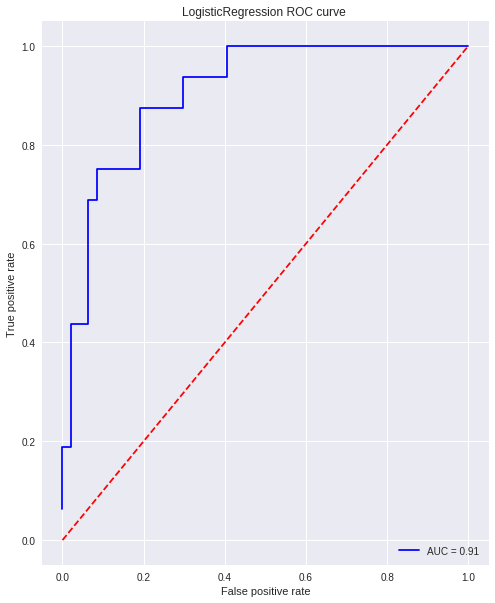

In [22]:
threshold = plot_roc(logreg2, Xtest, Ytest)

### Logistic regression CV

In [23]:
logregcv = LogisticRegressionCV(Cs=10)
logregcv.fit(Xtrain, Ytrain)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [24]:
print("score",logreg2.score(Xtest,Ytest))

score 0.8095238095238095


AUC score: 0.905585 


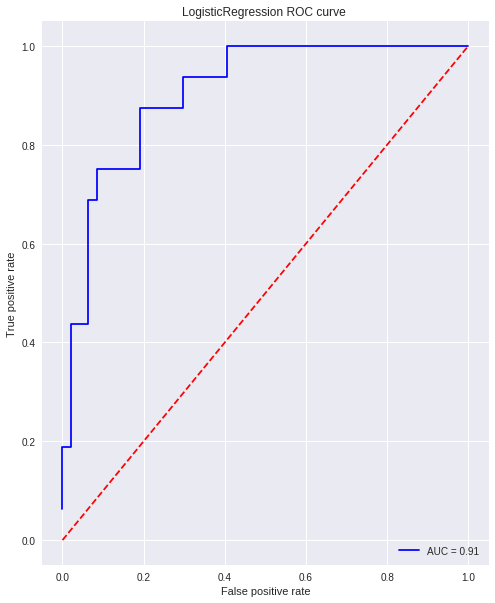

In [25]:
threshold = plot_roc(logreg2, Xtest, Ytest)

### SVM

In [26]:
def svc_param_selection(X, y, nfolds):
    np.random.seed(41)
    Cs = [0.001, 0.01, 0.1, 1, 10, 100]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ['linear', 'rbf']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}
    grid_search = GridSearchCV(SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [27]:
svc_param_selection(Xtrain, Ytrain, 10)

{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}

In [28]:
svcmodel = SVC(C = 0.01, gamma=0.001, kernel='linear', probability=True)
svcmodel.fit(Xtrain, Ytrain)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Validation score 0.7142857142857143
--------------------------------------------
test score 0.8412698412698413
--------------------------------------------
AUC score: 0.922872 


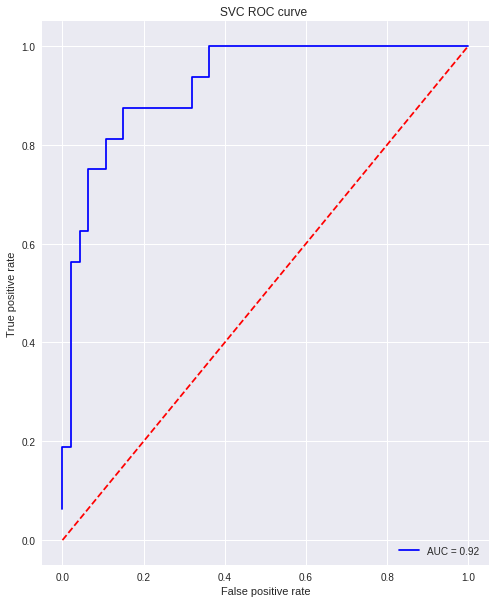

In [29]:
print("Validation score",svcmodel.score(Xval,Yval))
print("--------------------------------------------")
print("test score",svcmodel.score(Xtest,Ytest))
print("--------------------------------------------")
threshold = plot_roc(svcmodel, Xtest, Ytest)

In [30]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = svcmodel.predict(Xtest)
cm = metrics.confusion_matrix(Ytest, y_pred)
#print(cm)

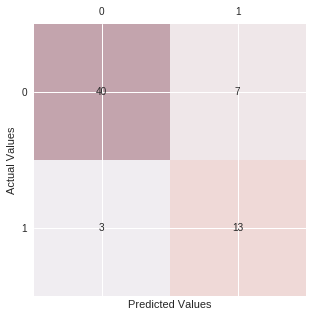

             precision    recall  f1-score   support

         -1       0.93      0.85      0.89        47
          1       0.65      0.81      0.72        16

avg / total       0.86      0.84      0.85        63



In [31]:
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(Ytest, y_pred ))

### KNN

In [32]:
def KNN_param_selection(X, y):
    np.random.seed(41)
    k_range = list(range(1, 20))
    
    weight_options = ['uniform', 'distance']
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    knn = KNeighborsClassifier()
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10)
    # fit the grid with data
    grid.fit(X, y)
    return grid.best_params_

In [33]:
KNN_param_selection(Xtrain, Ytrain)

{'n_neighbors': 10, 'weights': 'distance'}

In [34]:
knnmodel = KNeighborsClassifier(n_neighbors=10, weights='distance')
knnmodel.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

Validation score 0.5714285714285714
--------------------------------------------
test score 0.6349206349206349
--------------------------------------------
AUC score: 0.617021 


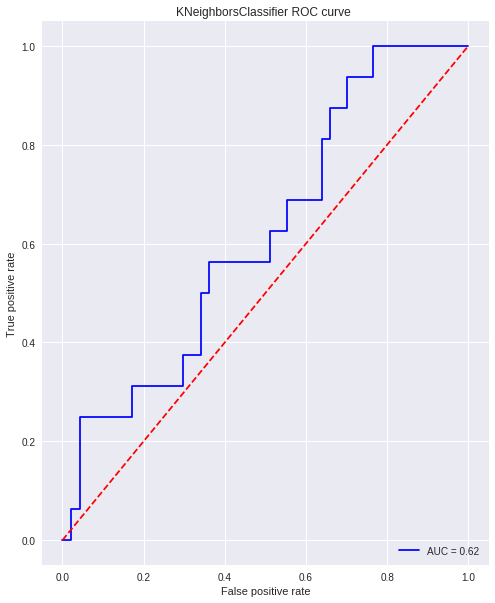

In [35]:
print("Validation score",knnmodel.score(Xval,Yval))
print("--------------------------------------------")
print("test score",knnmodel.score(Xtest,Ytest))
print("--------------------------------------------")
threshold = plot_roc(knnmodel, Xtest, Ytest)

### Gradient Boosting Classifier

In [36]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(Xtrain, Ytrain)
clf.score(Xtest, Ytest)

0.7301587301587301

AUC score: 0.767287 


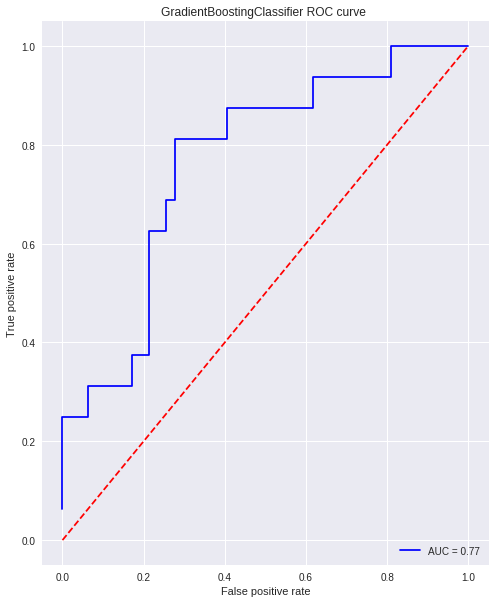

In [37]:
threshold = plot_roc(clf, Xtest, Ytest)

### Voting

In [38]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Logreg', logreg2),('Logreg', logregcv), ('SVM', svcmodel), ('KNN', knnmodel), ('clf', clf)], 
                       voting='soft', weights=[2,2,2,2,2]).fit(Xtrain,Ytrain)

In [39]:
print('The accuracy is:',ensemble.score(Xtest,Ytest))

The accuracy is: 0.8253968253968254


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


AUC score: 0.894947 


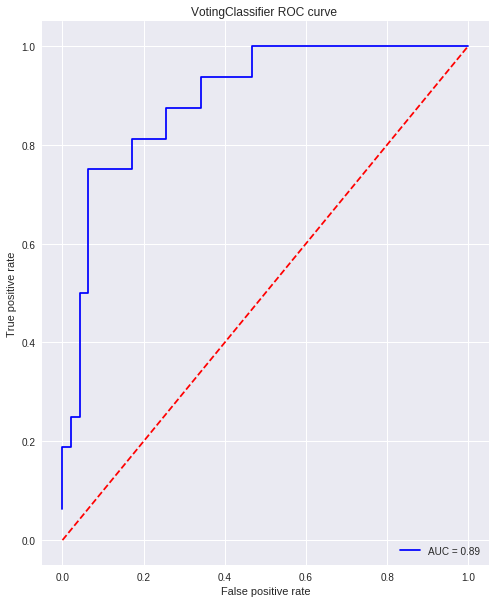

In [40]:
threshold = plot_roc(ensemble, Xtest, Ytest)

In [41]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred1 = ensemble.predict(Xtest)
cm1 = metrics.confusion_matrix(Ytest, y_pred1)
#print(cm)

/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


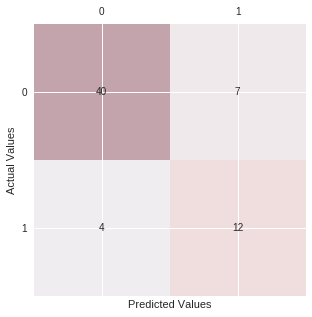

             precision    recall  f1-score   support

         -1       0.91      0.85      0.88        47
          1       0.63      0.75      0.69        16

avg / total       0.84      0.83      0.83        63



In [42]:
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm1, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm1.shape[0]):
     for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,
                s=cm1[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(Ytest, y_pred1 ))

### Prediction on xtest

In [55]:
x_test = xtest.T[good_features]
x_test = x_test.T
x_test

,x1001_at,x10098_at,x10202_at,x10227_at,x1022_at,x1033_at,x10351_at,x10420_at,x10451_at,x10516_at,...,x9510_at,x9569_at,x9582_at,x9700_at,x9735_at,x9743_at,x9805_at,x9859_at,x9936_at,x9939_at
1,3.6,6.69,11.97,8.17,8.36,6.19,2.66,5.88,7.65,6.11,...,6.29,7.91,5.03,2.77,3.09,7.04,6.26,3.82,6,7.09
2,4.6,7.97,8.59,7.94,7.81,4.84,2.19,5.34,9.93,6.12,...,5.17,8.64,3.59,2.69,3.38,8.07,8.12,2.59,6.01,5.96
3,5.39,4.48,7.18,8.04,8.17,6.18,2.19,5.71,8.25,6.7,...,4.94,8.29,4.69,2.93,3.61,8.7,6.53,2.99,4.89,6.86
4,4.96,8.21,6.99,8.57,7.82,5.97,6.16,5.2,7.78,5.68,...,6.43,9.44,5.03,2.57,3.28,4.88,8.51,5.48,7.38,6.43
5,11.21,4.13,2.19,6.81,6.04,7.24,2.19,4.78,3.68,6.53,...,7.78,8.76,9.81,4.15,6.92,4.56,9.17,4.78,2.91,7.41
6,8.86,3.64,2.19,8.35,7.9,7.22,2.19,4.98,4.54,4.95,...,8.56,9.31,7.99,4.85,4.11,4.92,4.93,7.74,2.19,7.27
7,8.17,5.73,2.28,9.32,7.44,7.23,2.19,5.68,8.15,5.82,...,7.26,9,5,4.19,3.32,5.74,4.93,3.43,4.69,7.02
8,10.01,4.64,2.22,8.47,5,5.18,2.19,5.34,4.19,8.57,...,7.27,8.32,4.98,3.15,3.09,6.09,6.89,4.84,4.91,6.55
9,3.6,4.48,2.23,7.9,7.49,5.85,3.39,5.18,6.75,6.22,...,4.51,8.97,3.06,2.93,3.4,6.06,6.73,6.2,5.25,8.03
10,5.57,4.48,10.94,8.02,3.93,5.97,2.19,5.3,8.06,5.64,...,4.62,7.9,6.74,3.58,4.34,7.13,6.35,6.18,3.4,5.44


In [58]:
n = 0
for i in range(len(x_test)):
    if(ensemble.predict_proba(x_test)[i][1] >= 0.5):
        n +=1
    print('sample'+str(i+1),'--------------------------------->', ensemble.predict_proba(x_test)[i][1])
print(n)

sample1 ---------------------------------> 0.06355698931417492
sample2 ---------------------------------> 0.23874456313754325
sample3 ---------------------------------> 0.20467104485083545
sample4 ---------------------------------> 0.39082670898829963
sample5 ---------------------------------> 0.36999420311594844
sample6 ---------------------------------> 0.2432626167126089
sample7 ---------------------------------> 0.09495223580946469
sample8 ---------------------------------> 0.2066542806041715
sample9 ---------------------------------> 0.7566852068068344
sample10 ---------------------------------> 0.15630638561383953
sample11 ---------------------------------> 0.8713567564870687
sample12 ---------------------------------> 0.4391143635846896
sample13 ---------------------------------> 0.5477662198279256
sample14 ---------------------------------> 0.09368651493638869
sample15 ---------------------------------> 0.8713526411284189
sample16 ---------------------------------> 0.1991537362